In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


In [ ]:
from betacal import BetaCalibration
from  scipy.stats import beta


In [2]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

{'pred_probs': array([0.03377331, 0.07392381, 0.12517684, 0.17499047, 0.22539157,
        0.27463233, 0.32470085, 0.37393452, 0.42294409, 0.47050549,
        0.51885531, 0.57027788, 0.62372845]),
 'emp_probs': array([0.0031348 , 0.0034459 , 0.00811808, 0.00989446, 0.0115258 ,
        0.02082128, 0.01862302, 0.02117803, 0.03065134, 0.05252525,
        0.025     , 0.        , 0.        ]),
 'bin_counts': array([1276., 1451., 1355., 1516., 1822., 1729., 1772., 1511., 1044.,
         495.,  160.,   35.,    5.])}

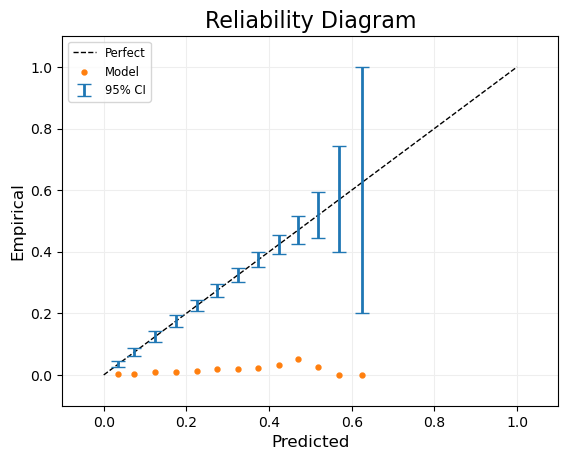

In [127]:
 
a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
synth_pos = np.random.beta(a,b,size = int( len(pos)*2.5 ))
many_pos = np.concatenate((pos, synth_pos))
#many_pos = synth_pos
probs = np.concatenate((subneg, many_pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
bc = BetaCalibration()
bc.fit(probs, subgold)
beta_test = bc.predict(p_test) 

mli.plot_reliability_diagram(y_test,  beta_test)


In [152]:
from matplotlib.pyplot import figure 
figure(figsize = (3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

In [163]:
?BetaCalibration

Init signature: BetaCalibration(parameters='abm')
Docstring:     
Wrapper class for the three Beta regression models introduced in 
Kull, M., Silva Filho, T.M. and Flach, P. Beta calibration: a well-founded 
and easily implemented improvement on logistic calibration for binary  
classifiers. AISTATS 2017.

Parameters
----------
parameters : string
    Determines which parameters will be calculated by the model. Possible
    values are: "abm" (default), "am" and "ab"

Attributes
----------
calibrator_ :
    Internal calibrator object. The type depends on the value of parameters.
File:           d:\programs\anaconda3\envs\pancrisk\lib\site-packages\betacal\__init__.py
Type:           type
Subclasses:     

In [175]:
def beta_smote(pos, subneg, p_test, y_test, 
               synth_size):

    a, b, loc, scale = beta.fit(pos, floc=0, fscale=1)
    #a, b, loc, scale = beta.fit(pos)
    synth_pos = np.random.beta(a,b, size = int( len(pos)*synth_size ))
    many_pos = np.concatenate((pos, synth_pos))
    #many_pos = synth_pos
    probs = np.concatenate((subneg, many_pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , np.ones(len(many_pos)    ) ) )
    bc = BetaCalibration()
    bc.fit(probs, subgold)
    beta_test = bc.predict(p_test) 
    figure (figsize=(2.5,2.5))
    mli.plot_reliability_diagram(y_test,  beta_test)


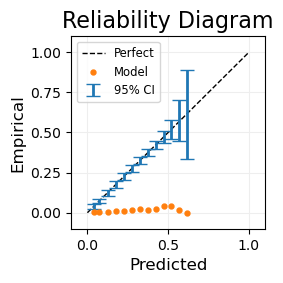

In [176]:
beta_smote(pos_2, subneg=np.random.choice(neg_2, 15*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=5)

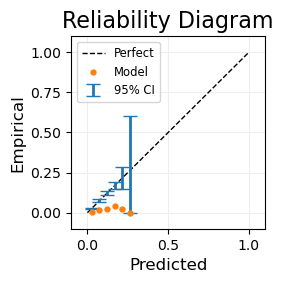

In [177]:
beta_smote(pos_2, subneg=np.random.choice(neg_2, 50*sum(gold2)),
           p_test = tp2, y_test= M_test2['golds'],   synth_size=3.5)

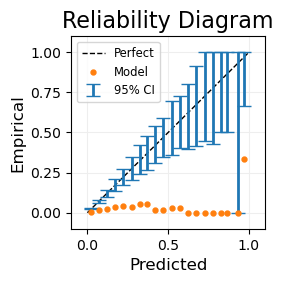

In [174]:
beta_smote(pos_3, 
           subneg=np.random.choice(neg_3, 32*sum(gold3)),
           p_test = tp3, 
           y_test= M_test3['golds'],  
           synth_size=2.5)

In [ ]:
pos = pos_2
p_test = tp2
y_test = M_test2['golds']
subneg = np.random.choice( neg_2, 10*sum(gold2))
 

In [82]:
def beta_fun(pos, subneg, p_test, y_test):

    boot = np.concatenate((subneg, pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
    bc = BetaCalibration()
    bc.fit(boot, subgold)
    beta_test = bc.predict(p_test)

    #mli.plot_reliability_diagram( subgold , boot, error_bars=False);
    #tvec = np.linspace(.01, .99, 99)
    #plt.plot(tvec, bc.predict(tvec))
    mli.plot_reliability_diagram(y_test,  beta_test);

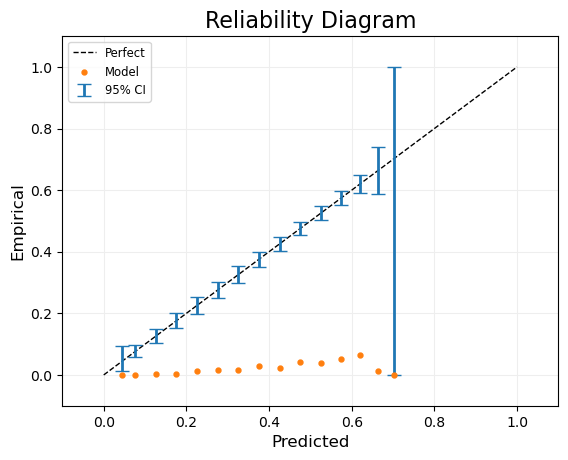

In [97]:
beta_fun(pos_1, np.random.choice(neg_1, int(1.34*sum(gold1))),  tp1, M_test1['golds'])

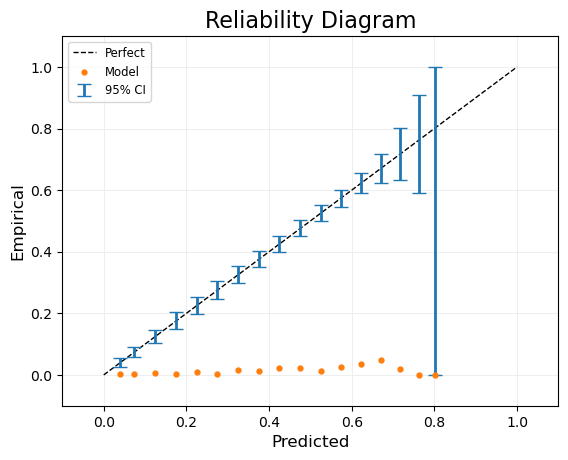

In [99]:
beta_fun(pos_2, np.random.choice(neg_2, int(1.5*sum(gold2))),  tp2, M_test2['golds'])

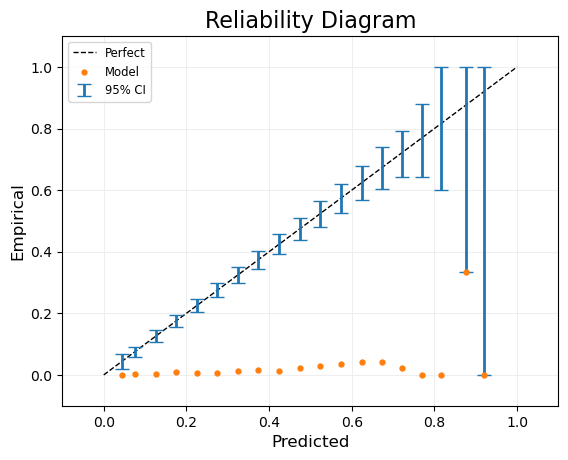

In [103]:
beta_fun(pos_3, np.random.choice(neg_3, int(2*sum(gold3))),  tp3, M_test3['golds'])

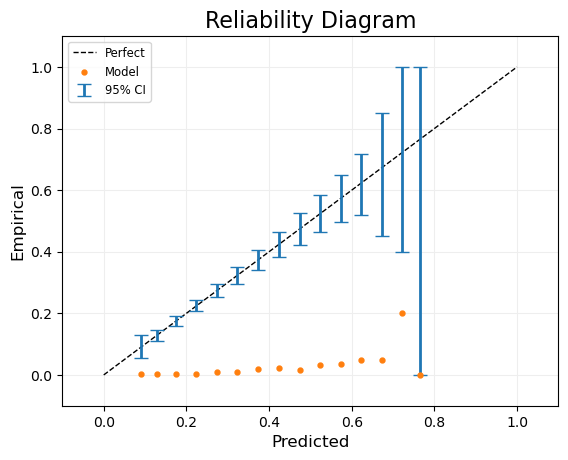

In [106]:
beta_fun(pos_4, np.random.choice(neg_4, int(2.5*sum(gold4))),  tp4, M_test4['golds'])

In [3]:
iso =  IsotonicRegression(out_of_bounds = 'clip')
iso.fit(   (boot1), subgold1)
iso_prob = iso.predict(    (tp1))
#iso2 =isotonic2 ( logit(boot1),  subgold1,   logit(tp1) )

custom_bins_a = np.array([0,.01,.02,.03,.05, .1, .3, .5, .75, 1])

mli.plot_reliability_diagram( M_test1['golds'] ,  ( iso_prob), scaling = 'logit', 
                             bins = custom_bins_a);
tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, iso.predict( (tvec)), label='Isotonic');
plt.title('Isotonic Calibration Curve on Calibration Data');


NameError: name 'boot1' is not defined

In [4]:
?mli.plot_reliability_diagram

Signature:
mli.plot_reliability_diagram(
    y,
    x,
    bins=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
    show_baseline=True,
    baseline_color='black',
    baseline_width=1,
    error_bars=True,
    error_bar_color='C0',
    error_bar_alpha=0.05,
    error_bar_width=2,
    ci_ref='axis',
    marker='.',
    marker_color='C1',
    marker_edge_color='C1',
    marker_size=50,
    scaling='none',
    scaling_eps=0.0001,
    scaling_base=10,
    cap_width=1,
    cap_size=5,
    show_histogram=False,
    bin_color='C0',
    bin_edge_color='black',
    ax1_x_title='Predicted',
    ax1_y_title='Empirical',
    ax2_x_title='Predicted Scores',
    ax2_y_title='Count',
    ax_title_weight='normal',
    ax_title_size=12,
    title_size=16,
    title_weight='normal',
    reliability_title='Reliability Diagram',
    histogram_title='Probability Distribution',
    layout_pad=3.0,
    legend_names

In [5]:
from  scipy.stats import beta


In [6]:
?beta.fit

Signature: beta.fit(data, *args, **kwds)
Docstring:
Return estimates of shape (if applicable), location, and scale
parameters from data. The default estimation method is Maximum
Likelihood Estimation (MLE), but Method of Moments (MM)
is also available.

Starting estimates for the fit are given by input arguments;
for any arguments not provided with starting estimates,
``self._fitstart(data)`` is called to generate such.

One can hold some parameters fixed to specific values by passing in
keyword arguments ``f0``, ``f1``, ..., ``fn`` (for shape parameters)
and ``floc`` and ``fscale`` (for location and scale parameters,
respectively).

Parameters
----------
data : array_like or `CensoredData` instance
    Data to use in estimating the distribution parameters.
arg1, arg2, arg3,... : floats, optional
    Starting value(s) for any shape-characterizing arguments (those not
    provided will be determined by a call to ``_fitstart(data)``).
    No default value.
**kwds : floats, optional
    -